In [75]:
price_a=[8.7, 8.91, 8.71]

In [76]:
price_a[1:]

[8.91, 8.71]

In [77]:
price_a[1:]

[8.91, 8.71]

In [78]:
price_a[:-1]

[8.7, 8.91]

#### We got this error because python does not treat lists as vectors. This is quite different to languages like R or matlab where this kind of operations would be easily handled

### So, How to perform this task? 

#### USe Numpy and Pandas

In [79]:
import numpy as np

In [80]:
price_a=np.array([8.7, 8.91, 8.71])

#### Now if I were to run the same code again, it will run normal and we would get our answer

In [81]:
price_a[1:]/price_a[:-1]-1

array([ 0.02413793, -0.02244669])

#### The reason we got our answer is because the list has now been converted to a numpy array

In [82]:
import pandas as pd

In [83]:
prices=pd.DataFrame({"BLUE":[8.7, 8.91, 8.71, 8.43, 8.73],
                    "ORANGE":[10.66, 11.08, 10.71, 11.59, 12.11]})

In [84]:
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [85]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [86]:
prices.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


#### Now, lets first try to calculate the returns in a wrong way and then examine it

In [87]:
prices.iloc[1:]/prices.iloc[:-1]

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


#### As you might have already figured out, this does not work


#### So, whats the correct way?

##### 1st method:

In [88]:
prices.iloc[1:].values/prices.iloc[:-1]-1

# The .values takes a df and just pulls the values out thereby giving a numpy array that we had before. So, basically
# its gives out a numpy without the indexing stuff 

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


#### A better method is this one: using "shift" method

In [89]:
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


#### What is essentially happening here is that the rows are being shifted 1 step downwards. So, in this situation, now if I wanna calculate returns, I can do just this:

In [90]:
prices/prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


#### Lastly, the percentage change method

In [91]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


#### This is hands down the most simplest way to compute returns

In [92]:
import os
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera\\Week 1 Risk and Returns\\data'

In [93]:
os.chdir("C:\\Users\\user\\Documents\\Coursera\\Week 1 Risk and Returns\\data")

In [94]:
prices=pd.read_csv("sample_prices.csv")

In [95]:
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [96]:
# Calculate returns

returns=prices.pct_change()
returns.head()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544


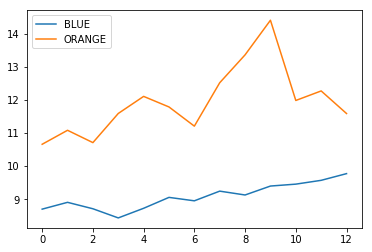

In [97]:
prices.plot()

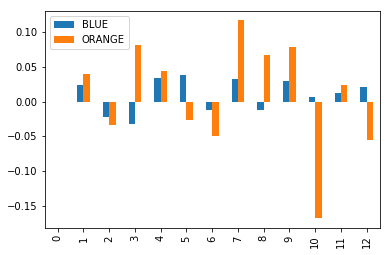

In [98]:
returns.plot.bar()

#### We can also compare the standard deviation of the series 

In [99]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [100]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

#### If I want to compute the compunded returns for each of this returns series i.e Blue and Orange, there are many ways to do it:


#### 1st method: Use .prod() method

In [101]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

#### When we add 1 with returns, we are basically adding 1 in every item in the series to make a (1+r) format

#### 2nd method: Use numpy.prod()

In [102]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

## Risks

In [103]:
import pandas as pd

In [104]:
import os

In [105]:
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera\\Week 1 Risk and Returns\\data'

In [106]:
os.chdir("C:\\Users\\user\\Documents\\Coursera\\Week 1 Risk and Returns\\data")

In [107]:
prices=pd.read_csv("sample_prices.csv")

In [108]:
prices.head()

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070


In [109]:
returns=prices.pct_change()

In [110]:
returns=returns.dropna()

In [111]:
returns.head()

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381


#### By the way, what was the standard deviation of these two assets?

In [112]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

#### Lets dissect the standard deviation

In [113]:
deviations=returns-returns.mean()
squared_deviations=deviations**2
variance=squared_deviations.mean()
volatility=variance**0.5

In [114]:
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

#### Do you see something interesting? Even though both of these methods are calculating the standard deviations from the same data, the final result do not exactly match. Why do you think that is?

##### Well, the answer is actually very simple. It goes back to the stats 101 where we learned that calculating variance by using just "N" and calculating variance with "N-1" in the denominator can result in very different output. 

#### Simple case of Sample S.D vs Population S.D

#### The .std() method uses N-1 and not surprisingly that is exactly the reason why the output here is larger than the dissected method where we used just N in the denominator i.e. a larger value in the denominator

### Lets fix this issue alright. All we need is to divide by N-1 to match the results

In [115]:
returns.shape

(12, 2)

In [116]:
no_of_obs=returns.shape[0]

In [117]:
variance=squared_deviations.sum()/(no_of_obs-1)
volatility=variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

#### This was monthly data. Hence, the vol is monthly vol. Can we annualize this?

In [118]:
ann_vol=volatility*(12**0.5)
ann_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [119]:
returns_ff=pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0 ,header=0, parse_dates=True,
                      na_values="-99.99")
returns_ff

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [120]:
columns=['Lo 10' , 'Hi 10']
returns_ff=returns_ff[columns]
returns_ff.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


##### The FF returns data are already multiplied by 100 which creates confusion while computing and working with other dataset. So, lets convert that to raw form

In [121]:
returns_ff=returns_ff/100
returns_ff.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [122]:
returns_ff.columns=["Small caps", "Large caps"]
returns_ff.head()

,Small caps,Large caps
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [123]:
import matplotlib.pyplot as plt

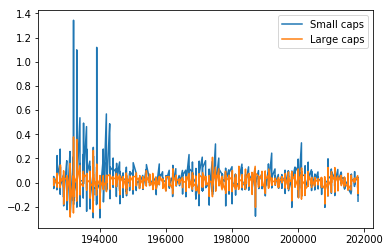

In [124]:
returns_ff.plot() # The default plot in this is the line plot

#### The plot quite clearly demonstrates that the large cap stocks are much less volatile. Seeing this in number might also help:

In [125]:
returns_ff.std()

Small caps    0.106288
Large caps    0.053900
dtype: float64

#### So, as we can see, the volatility is almost double in the small cap segment of the universe. Now, lets annualize these stds

In [126]:
ann_vol=returns_ff.std()*(12**0.5)
ann_vol

Small caps    0.368193
Large caps    0.186716
dtype: float64

#### How about annualizing the returns?

In [127]:
returns_ff.describe()

,Small caps,Large caps
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


In [128]:
no_of_months=returns_ff.shape[0]

In [129]:
# For that, lets figure first the per month return

ret_per_month=((returns_ff+1).prod()**(1/no_of_months))-1
ret_per_month

Small caps    0.012986
Large caps    0.007423
dtype: float64

In [130]:
# Now calculate the annualized return

ann_ret=((ret_per_month+1)**(12))-1
ann_ret

Small caps    0.167463
Large caps    0.092810
dtype: float64

#### There is also another way and rather a easy and fast way to calculate ann return

In [131]:
ann_ret1=((returns_ff+1).prod()**(12/no_of_months))-1 #12 at the numerator coz we have monthly returns in our dataset
ann_ret1

Small caps    0.167463
Large caps    0.092810
dtype: float64

#### Returns on Risk ratio

In [132]:
ann_ret1/ann_vol

Small caps    0.454825
Large caps    0.497063
dtype: float64

In [133]:
rf=0.03 # Assuming here that 3 % is the average rate

#### In reality what you should be doing is taking the time-series average of the rf rate

In [134]:
sharpe_ratio=(ann_ret1-rf)/ann_vol
sharpe_ratio

Small caps    0.373346
Large caps    0.336392
dtype: float64

#### From the analysis, we can see that investing in small stocks did give us slightly higher risk adjusted returns

### Now lets do an exercise: Repeat the above analysis to check and compare the SR of two different size portfolios

### Previously, we considered two decile portfolios on the opposite extremes. However, now we shall be looking at two quintile portfolios which are at opposite extremes

#### If you are unaware of quintile portfolios, they are simply formed using the top 20 % of the stocks based on market-cap and the bottom 20 % of the stocks based on market cap

In [135]:
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera\\Week 1 Risk and Returns\\data'

In [136]:
# Lets look at the data

quint_ret=pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0, na_values="-99.99", header=0, parse_dates=True)
quint_ret.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [137]:
columns=["Lo 20","Hi 20"]

In [138]:
quint_ret=quint_ret[columns]
quint_ret

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16
...,...,...
201808,3.09,2.49
201809,-2.04,0.19
201810,-10.52,-7.41
201811,-2.78,2.49


In [139]:
quint_ret=quint_ret/100

In [140]:
quint_ret.describe()

,Lo 20,Hi 20
count,1110.000000,1110.000000
mean,0.015904,0.009434
std,0.097197,0.056325
min,-0.309900,-0.304000
25%,-0.026950,-0.019175
50%,0.011900,0.012300
75%,0.048300,0.038375
max,1.126000,0.416300


#### Although the describe method already has given us mean and std, lets first calculate mean and stdv seperately as well

In [141]:
quint_ret.mean()

Lo 20    0.015904
Hi 20    0.009434
dtype: float64

In [142]:
quint_ret.std()

Lo 20    0.097197
Hi 20    0.056325
dtype: float64

#### Now, time for annualized vol

In [143]:
quint_ann_vol=(quint_ret.std())*(12**0.5)
quint_ann_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

#### Annualized return

In [144]:
no_of_mnth=quint_ret.shape[0]
no_of_mnth

1110

In [145]:
ret_per_mnth=(quint_ret+1).prod()**(1/no_of_mnth)-1
ret_per_mnth

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [146]:
quint_ann_ret=(ret_per_mnth+1)**(12)-1
quint_ann_ret

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

## OR

In [147]:
quint_ann_ret1=(quint_ret+1).prod()**(12/no_of_mnth)-1
quint_ann_ret1

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

#### SR of the quintile portfolios

In [148]:
Excess_ret=quint_ann_ret1-rf
Excess_ret

Lo 20    0.121977
Hi 20    0.068490
dtype: float64

In [149]:
SR=Excess_ret/quint_ann_vol
SR

Lo 20    0.362271
Hi 20    0.351023
dtype: float64

#### If we compare this to what we had calculated previously i.e. the SR for decile portfolios, we can see the difference.
#### For the decile portfolios, we had difference 0.035 but now the spread has narrowed even more

In [150]:
returns_ff.mean() # I have not explicitly mentioned here, but these are decile portfolios

Small caps    0.017598
Large caps    0.008870
dtype: float64

In [151]:
quint_ret.mean() # These are quintile portfolios

Lo 20    0.015904
Hi 20    0.009434
dtype: float64

In [152]:
returns_ff.std()

Small caps    0.106288
Large caps    0.053900
dtype: float64

In [153]:
quint_ret.std()

Lo 20    0.097197
Hi 20    0.056325
dtype: float64

#### I think this is an important time to discuss how the construction of the portfolios go on to play a significant part on risks and returns. 

#### As we moved up from decile portfolios (top and bottom 10%) to quintile portfolios (top and bottom 20%), we observe that as we go higher up the list from 10 to 20%, the average returns actually decrease. One of the reason behind this effect might be the fact that the quintile portfolio is simply more diversified than a decile portfolio. Less concentration or more diversification results in less returns however, it also results in less risk as measured by std. deviation

## Max Drawdowns

In [154]:
import pandas as pd
ff_data=pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", index_col=0, parse_dates=True, header=0, na_values="-99.99")
ff_data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [155]:
# Lets extract the top decile and the bottom decile portfolios

dec_port=(ff_data[["Lo 10","Hi 10"]])/100
dec_port.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [156]:
# Change the column names 

dec_port.columns=["SmallCap","LargeCap"]
dec_port.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


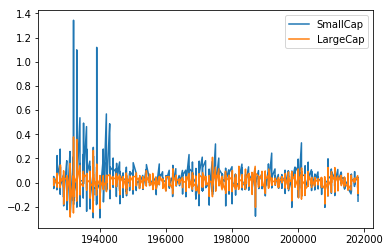

In [157]:
# Lets plot it out just to see how does the data look

dec_port.plot()

#### Although we had asked to parse dates, pandas does not seem to care much about it

In [158]:
dec_port.index

# Clearly, the index column is indeed the date column but the dtype states that it is still an integer. Hence, pandas is not
# treating this as a datetime series but rather an integer series. This is not what we want. Moreover, when we 
# look at the date column, it does not really look like an actual date you know. So, what happening here?

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

#### Converting to a datetime series

In [159]:
dec_port.index=pd.to_datetime(dec_port.index, format="%Y%m") 
dec_port.head()
#The code above is basically saying "Take this dec_port return.index and treat it as a datetime in the format of %Y%m. So, I
# am telling it the format that this dec_return.index series is in and convert it to a datetime 

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [160]:
dec_port.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

#### You can clearly see that now the index col is different. This finally looks like an actual date

In [161]:
# However, there still is one issue that I can see. Why is the month starting from 01 on each time obs? It is supposed to be
# the returns over the period from t-1 to t month! Is there any way we could remove that 01 thingy?

dec_port.index=dec_port.index.to_period("M") # The .to_period() here basically says that each one of these timestamps in the
                                            # data should be treated as period of a month. M is the period here i.e. monthly



In [162]:
dec_port.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


#### You might still be asking, "Why in the world do we needed to do that?"

In [163]:
# Well, the ans lies on the convenience that we can enjoy afterwards. For example, while writing following codes:

dec_port["1987"]

,SmallCap,LargeCap
1987-01,0.1185,0.1350
1987-02,0.0796,0.0441
1987-03,0.0460,0.0143
1987-04,-0.0109,-0.0220
1987-05,0.0068,0.0101
1987-06,0.0195,0.0543
1987-07,0.0304,0.0468
1987-08,0.0035,0.0401
1987-09,-0.0119,-0.0152
1987-10,-0.2770,-0.2033


#### Steps to compute max drawdowns 

#### 1) Compute a wealth index
#### 2) Compute previous peaks
#### 3) Compute drawdowns- which is the wealth value as a percentage of previous peak

In [164]:
dec_port.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [166]:
# Lets start with large caps

wealth_index=1000*(1+dec_port["LargeCap"]).cumprod()
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

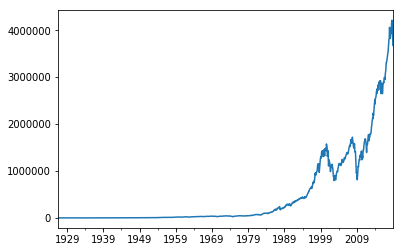

In [167]:
wealth_index.plot()

In [173]:
# Now lets compute previous peaks

previous_peak=wealth_index.cummax()
previous_peak.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

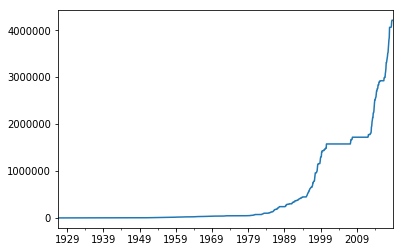

In [172]:
previous_peak.plot()

The flat portion in the above plot means that there was a drawdown. It is flat because even though there was a drawdown the cum max value that is already obtained does not change. This is the reason that this plot only goes up.

In [170]:
drawdown=(wealth_index-previous_peak)/previous_peak
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

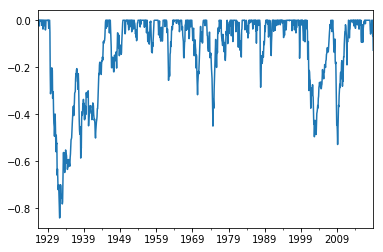

In [174]:
drawdown.plot()

We can clearly see that in the crash of 1929, the drawdown was MASSIVE. More than 80% of the wealth was destroyed

In [175]:
# Lets find out what was the exact maximum drawdown

drawdown.min()

-0.8400375277943123

As we can see negative 84% was the max drawdown

In [176]:
# Lets find out a drawdown after a certain point in time. Lets say we wanna know what happened after 1975?

# For that, we can just use slicing 

drawdown["1975":]

1975-01   -0.293370
1975-02   -0.250053
1975-03   -0.219005
1975-04   -0.177534
1975-05   -0.127364
             ...   
2018-08    0.000000
2018-09    0.000000
2018-10   -0.065700
2018-11   -0.042062
2018-12   -0.127319
Freq: M, Name: LargeCap, Length: 528, dtype: float64

Alright, we got all the possible drawdowns that had occured until 2018. But we wanted to know how much was the max drawdown in that timeframe?

The solution is to use the .min() method on the slice that we have created

In [177]:
drawdown["1975":].min()

-0.5280945042309304

we got negative 52 % drawdown from the time period of 1975-2018 but we still do not know when did this happen?

This can be extracted by using .idxmin() method

In [178]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

There you go, it turns out in Feb of 2009, there was a monthly drawdown of -52.80%

#### Now that we have computed the max drawdown for large caps, its time now for the small cap portfolio

#### So, does that mean we gotta repeat everything we just did i.e. copy and paste and change the words around?

#### Ans: Well, we could do that but obviously it is very time consuming. Instead we can try to solve this problem using functions

In [184]:
def drawdown(return_series:pd.Series):
    """
    Takes a time-series of asset returns and 
    computes and returns a df that contains:
    the wealth index
    the previous peaks
    and percent drawdowns
    """

    wealth_index=1000*(1+return_series).cumprod() # Note that we do not know what is the return_series as of yet
    previous_peaks=wealth_index.cummax()
    drawdowns=(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [185]:
drawdown(dec_port["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000
